<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/04.1-Read_QASM_file_and_string.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install qiskit-experiments
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html
* https://youtu.be/wG94YHKDIxc (qasm file convertion)



## Read a QASM file

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0],q[1];



In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(2)
qc.h(0)
qc.z(0)
qc.cx(0,1)
sv = Statevector([1,0,0,0])
array_to_latex(sv.evolve(qc))

qc.qasm(formatted=True, filename="Bell.qasm")

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
z q[0];
cx q[0],q[1];



In [16]:
!cat "./Bell.qasm"

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
z q[0];
cx q[0],q[1];


### Loading using QuantumCircuit.from_qasm_file()

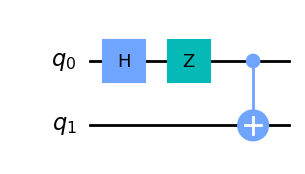

In [18]:
from qiskit import QuantumCircuit

qc = QuantumCircuit.from_qasm_file("./Bell.qasm")
qc.draw()

### Another way, using qiskit.qasm2

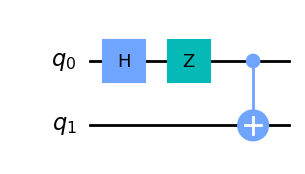

In [25]:
from qiskit import QuantumCircuit
from qiskit.qasm2 import load #load from a file

qc = load("./Bell.qasm")
qc.draw()

###Another way

## Quantum Circuit from qasm string

### Loading using QuantumCircuit.from_qasm_str()

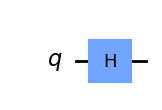

In [21]:
from qiskit import QuantumCircuit

qasm = '''
OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
h q[0];
'''

qc = QuantumCircuit.from_qasm_str(qasm)
qc.draw()

### Loading using qiskit.qasm2.loads()

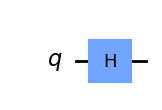

In [24]:
from qiskit import QuantumCircuit
from qiskit.qasm2 import loads #this is a load string command

qasm = '''
OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
h q[0];
'''

qc = loads(qasm)
qc.draw()